# Quiz 02

## Evaluating Groundwater and Spreading Grounds in Los Angeles County

You are provided local groundwater basins clipped to the Los Angeles county area (```data/Ground_Water_Basins_Feature_Layer.geojson```) in addition to local water conservation facilities for spreading and retaining stormwater for eventual percoloation to the groundwater basins (```data/Spreading_Grounds_Feature_Layer.geojson```).

You will complete an analysis to understand some basic statistics around the area and percoluation rates of the spreading grounds grouped by the groundwater basin they are located in.

1. Load both datasets. Examine and adjust the datasets if needed prior to further analysis. 
2. Take the ```Spreading_Grounds_Feature_Layer``` and generate two new dataframes: 
- One dataframe dissolving by the groundwater basin number (```NO__OF_BAS```) finding the total storage (```STORAGE```,in units acre-feet) area of spreading grounds per basin.
- One dataframe dissolving by the groundwater basin number (```NO__OF_BAS```) finding the mean percolation rate(```PERCOLATIO```, in units cubic feet per second (CFS)) of spreading grounds per basin.
3. Create two maps that display both dissolved dataframes. Also overlay the groundwater basins on each map (for example adding: ```groundwater_dataframe.plot(alpha=1,facecolor="none",edgecolor="black",zorder=10,ax=ax)```). Write a meaningful caption describing any spatial patterns.
4.  The ```Ground_Water_Basins_Feature_Layer```  has the groundwater basin name as a column called ```BASIN```. Create a single dataframe which contains the following columns from your analysis in step (2): basin name, basin number, total storage volume in AF, mean percolation rate in CFS. Note there are at least two ways to complete this last step. One way is using a spatial join, then selecting the columns of interest. The other way, requires just using dataframe merging logic to merge the dataframes knowing that the groundwater basin number is already present in both geodataframes, and selecting the columns of interest. I suggest using the first.

In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
from shapely.geometry import box,Point, LineString, Polygon
import geopandas as gpd


In [6]:
# 1. Load both datasets. Examine and adjust the datasets if needed prior to further analysis.
# Load data
data1 = gpd.read_file('data/Ground_Water_Basins_Feature_Layer.geojson')
data2 = gpd.read_file('data/Spreading_Grounds_Feature_Layer.geojson')

# Check CRS
print("The CRS for data 1 is", data1.crs)
print("The CRS for data 2 is", data2.crs)

# Reproject data 2 to espg 4326
data2 = data2.to_crs(crs=4326)

# Check CRS Again
print("The CRS for data 1 is", data1.crs)
print("The CRS for data 2 is", data2.crs)

# Preview data
data2.head(5)

The CRS for data 1 is epsg:4326
The CRS for data 2 is epsg:3857
The CRS for data 1 is epsg:4326
The CRS for data 2 is epsg:4326


,index,OBJECTID,ID,NAME,OWNER_OPER,BASIN_TYPE,NO__OF_BAS,SEASON_FIR,GROSS_AREA,WETTED_ARE,...,INTAKES,STORAGE,PERCOLATIO,CONTROLLED,UNCONTROLL,EQNUM,MXCREATIONSTATE,SHAPEAREA,SHAPELEN,geometry
0,0,1,EE,PACOIMA S.G.,LOS ANGELES COUNTY - DPW,SHALLOW,12,1932-33,169 ACRES,107.0 ACRES,...,600 CFS,440,65,"PACOIMA DAM, LOPEZ FLOOD CONTROL BASIN","EAST CANYON, PACOIMA WASH, IMPORTED WATER",None,1,6.984530e+06,17051.193678,"MULTIPOLYGON (((-118.45152 34.25178, -118.4513..."
1,1,2,C,SAN GABRIEL COASTAL BASIN S.G.,LOS ANGELES COUNTY - DPW,SHALLOW,3,1938-39,128 ACRES,96.0 ACRES,...,350 CFS,550,75,"SAN GABRIEL CANYON DAMS, SANTA FE & WHITTIER N...",,None,1,5.841535e+06,17754.592698,"POLYGON ((-118.08531 33.97695, -118.08369 33.9..."
2,2,3,BB,HANSEN S.G.,LOS ANGELES COUNTY - DPW,SHALLOW,20,1944-45,156 ACRES,105.0 ACRES,...,400 CFS,279,150,"HANSEN DAM, BIG TUJUNGA DAM",,None,1,7.613001e+06,24768.852743,"MULTIPOLYGON (((-118.39805 34.25192, -118.3983..."
3,3,4,DD,LOPEZ S.G.,LOS ANGELES COUNTY - DPW,SHALLOW,6,1956-57,18 ACRES,12.0 ACRES,...,25 CFS,24,15,"PACOIMA DAM, LOPEZ FLOOD CONTROL BASIN",,None,1,7.364379e+05,6923.087170,"MULTIPOLYGON (((-118.41587 34.29718, -118.4158..."
4,5,6,O,EATON S.B.,LOS ANGELES COUNTY - DPW,DEEP,1,1956-57,16 ACRES,10 ACRES,...,400 CFS,284,10,EATON WASH DAM,"DAM, SPREADING BASIN",None,1,7.896322e+05,4109.163553,"POLYGON ((-118.08238 34.12431, -118.08236 34.1..."


Take the Spreading_Grounds_Feature_Layer and generate two new dataframes:
- One dataframe dissolving by the groundwater basin number (NO__OF_BAS) finding the total storage (STORAGE,in units acre-feet) area of spreading grounds per basin.
- One dataframe dissolving by the groundwater basin number (NO__OF_BAS) finding the mean percolation rate(PERCOLATIO, in units cubic feet per second (CFS)) of spreading grounds per basin.

In [22]:
# 2.Take the Spreading_Grounds_Feature_Layer and generate two new dataframes
basin1 = data2[["NO__OF_BAS", "STORAGE", "geometry"]]

# Aggregate
storage = basin1.dissolve(by='NO__OF_BAS', aggfunc='sum')


In [8]:
basin2 = data2[["NO__OF_BAS", "PERCOLATIO", "geometry"]]

# Aggregate
percolation = basin2.dissolve(by='NO__OF_BAS', aggfunc='mean')

The mean percolation is 59.36 cfs


3. Create two maps that display both dissolved dataframes. Also overlay the groundwater basins on each map 
(for example adding: groundwater_dataframe.plot(alpha=1,facecolor="none",edgecolor="black",zorder=10,ax=ax)).

Write a meaningful caption describing any spatial patterns.

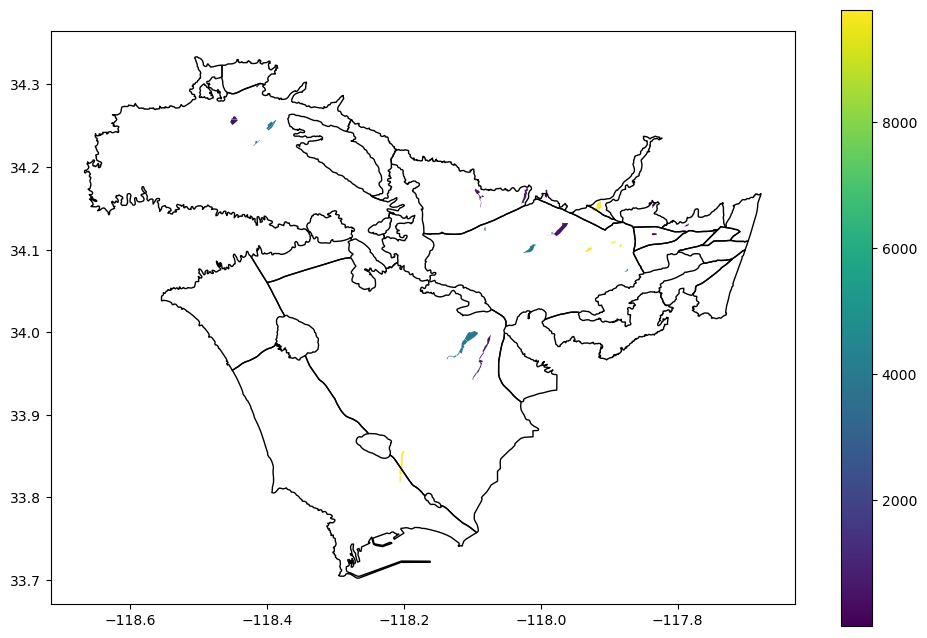

In [24]:
fig, (ax) = plt.subplots(figsize=(12, 8))
data1.plot(alpha=1,facecolor="none",edgecolor="black",zorder=10,ax=ax)

# (ax = ax) means put on same figure
storage.plot(ax=ax, column ='STORAGE', legend =True)
leg = ax.get_legend()
plt.show()


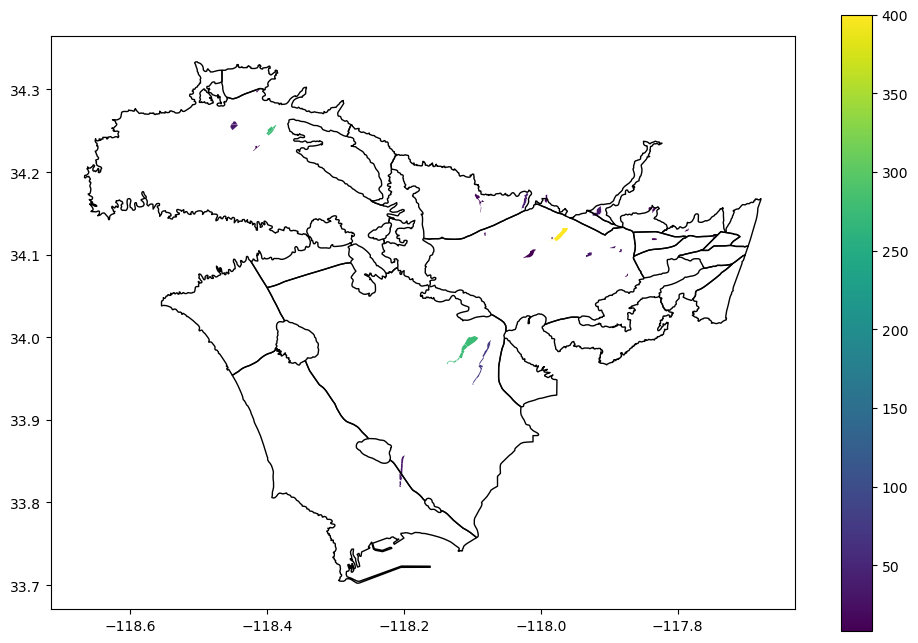

In [23]:
fig, (ax) = plt.subplots(figsize=(12, 8))
data1.plot(alpha=1,facecolor="none",edgecolor="black",zorder=10,ax=ax)

percolation.plot(ax=ax, column ='PERCOLATIO', legend =True)
leg = ax.get_legend()
plt.show()

For the areas with a lot of storage they also have less percolation. The southmost lake is a good example, it has over 8000 acre ft of storage and 50 cfs or less of percolation. There shows a clear correlation between the speed of percolation and amount of storage. 

There is clearly an error with the projection of data 2. 

4.  The ```Ground_Water_Basins_Feature_Layer```  has the groundwater basin name as a column called ```BASIN```. Create a single dataframe which contains the following columns from your analysis in step (2): basin name, basin number, total storage volume in AF, mean percolation rate in CFS. Note there are at least two ways to complete this last step. One way is using a spatial join, then selecting the columns of interest. 

The other way, requires just using dataframe merging logic to merge the dataframes knowing that the groundwater basin number is already present in both geodataframes, and selecting the columns of interest. I suggest using the first.

In [10]:
# Spacial Join
joindata = gpd.sjoin(basin1,basin2)

joindata.head(5)

basinnames = data2[["NAME"]]

# Add columns of interest
joindata2 = joindata.join(basinnames)

joindata2.head(5)

# Subtract columns of non interest
finaldata = joindata2[["NAME", "NO__OF_BAS_left", "STORAGE", "PERCOLATIO"]]

finaldata.head(5)

,NAME,NO__OF_BAS_left,STORAGE,PERCOLATIO
0,PACOIMA S.G.,12,440,65
1,SAN GABRIEL COASTAL BASIN S.G.,3,550,75
2,HANSEN S.G.,20,279,150
3,LOPEZ S.G.,6,24,15
4,EATON S.B.,1,284,10
